<a href="https://colab.research.google.com/github/fahadfahim13/Thesis/blob/master/Thesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!ls

clouds.jpg	omr3.jpg		      scan10.jpg  scan9.jpg
crop_3327.jpeg	OMR-Sheet-50-Questions-1.jpg  scan4.jpg
omr1.jpeg	OMR-Sheet-50-Questions.pdf    scan7.jpg
omr2.JPG	output			      scan8.jpg


In [0]:
!git clone https://github.com/fahadfahim13/Thesis.git

Cloning into 'Thesis'...
remote: Enumerating objects: 33, done.
remote: Counting objects: 100% (33/33), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 33 (delta 9), reused 10 (delta 1), pack-reused 0
Unpacking objects: 100% (33/33), done.


In [0]:
!ls

clouds.jpg	omr3.jpg		      scan10.jpg  scan9.jpg
crop_3327.jpeg	OMR-Sheet-50-Questions-1.jpg  scan4.jpg   Thesis
omr1.jpeg	OMR-Sheet-50-Questions.pdf    scan7.jpg
omr2.JPG	output			      scan8.jpg


In [0]:
%cd Thesis

/content/Thesis/Thesis


In [0]:
import requests
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import random
import cv2
import numpy as np
import os
import string

def plot(title, image, r=100, a_map='gray'):
        """
        Show image in new window

        :param title: Title of image
        :param image: the numpy array to represent
        :param a_map: default to greyscale image
        :return: NIL
        """
        height, width = image.shape[:2]
        print(height,width)
        _, ax = plt.subplots(1, figsize=(height//r, width//r))
        ax.set_title(title)
        if len(image.shape) == 3:
            ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        else:
            ax.imshow(image, cmap=a_map)
        ax.axis('off')
        plt.show()

def showI(filename, a_map='gray'):
  img = cv2.imread(filename, 0)
  plot(filename.split('.')[0], img,100, a_map)


def showLink(image_url):
  r = requests.get(image_url, allow_redirects=True)
  type(r.content)
  fl = image_url.split('/')[-1]
  open(fl, 'wb+').write(r.content)
  img = cv2.imread(fl)
  try:
    plot(fl, img)
  except:
    pass
  os.remove(fl)
  return img

1661 2015


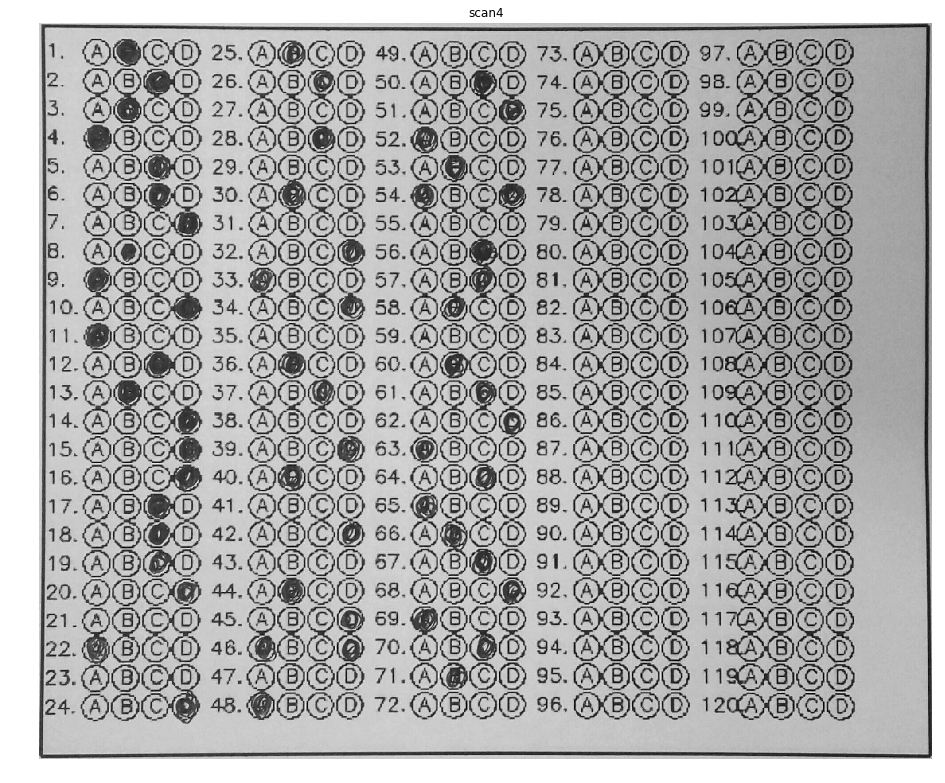

In [0]:
showI("scan4.jpg")

2339 1654


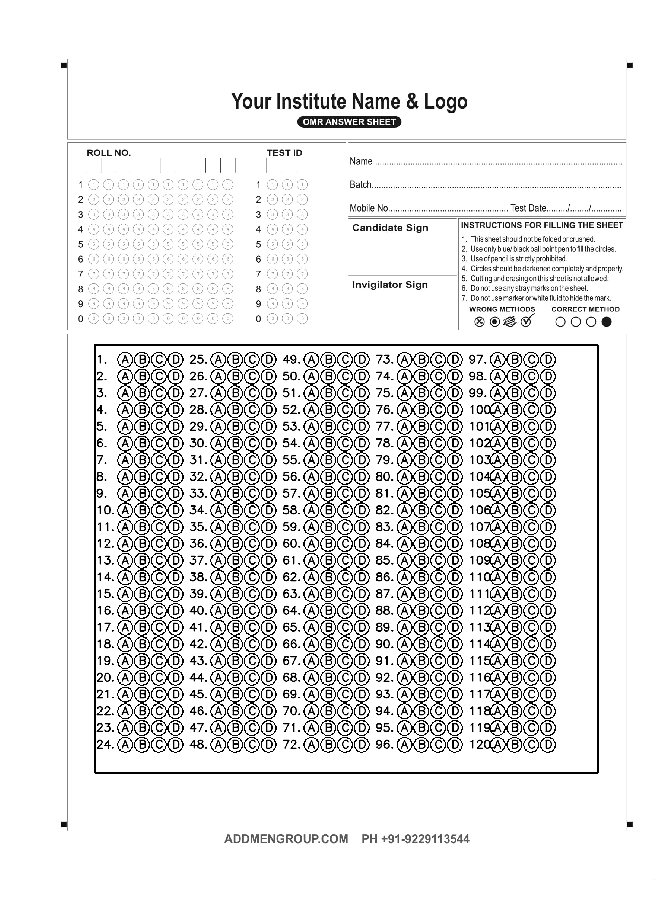

In [0]:
a = cv2.imread("OMR-Sheet-50-Questions-1.jpg", 0)
#a.shape
start = (150,900)
end = (1500,2050)
color = (0,0,0)
r =int(20)
gap = int(20)
cx = int(190)
cy = int(940)
font = cv2.FONT_HERSHEY_SIMPLEX
text = list(string.ascii_uppercase)
row = 0

#n = int(input("How many questions? (max 120): "))

n=int(120)
contours = np.array( [ [150,900],[1500,900], [1500,2050],[150,2050] ] )
img = np.zeros( (1350,1150) ) #create single channel 1350x1150 pixel black image 
cv2.fillPoly(a, pts =[contours], color=(255,255,255))

cv2.rectangle(a,start,end,color,3)
#cv2.circle(a,(cx,cy), r, color, 2)
#cv2.putText(a,'A',(cx-8,cy+8), font, 1,(0,0,0),2,cv2.LINE_AA)


for i in range(0,n):
  #cv2.circle(a,(cx,cy), r, color, 2)
  cv2.putText(a,str(i+1)+".",(cx-37,cy+9), font, 1,(0,0,0),2,cv2.LINE_AA)
  cx = 2*r + cx +1
  for j in range(0,4):
    cv2.circle(a,(cx,cy), r, color, 2)
    cv2.putText(a,text[j],(cx-9,cy+9), font, 1,(0,0,0),2,cv2.LINE_AA)
    cx = 2*r + cx +5
  cy = 2*r + cy +5 
  if(cy>2000):
    row = row + 1
    cy = int(940)
  cx = 190 + row*250



plot("",a)



31 40


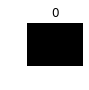

31 40


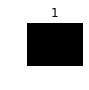

31 40


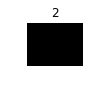

31 40


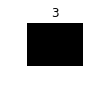

31 40


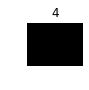

31 40


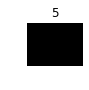

31 40


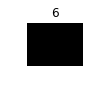

31 40


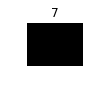

31 40


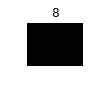

31 40


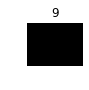

2339 1654


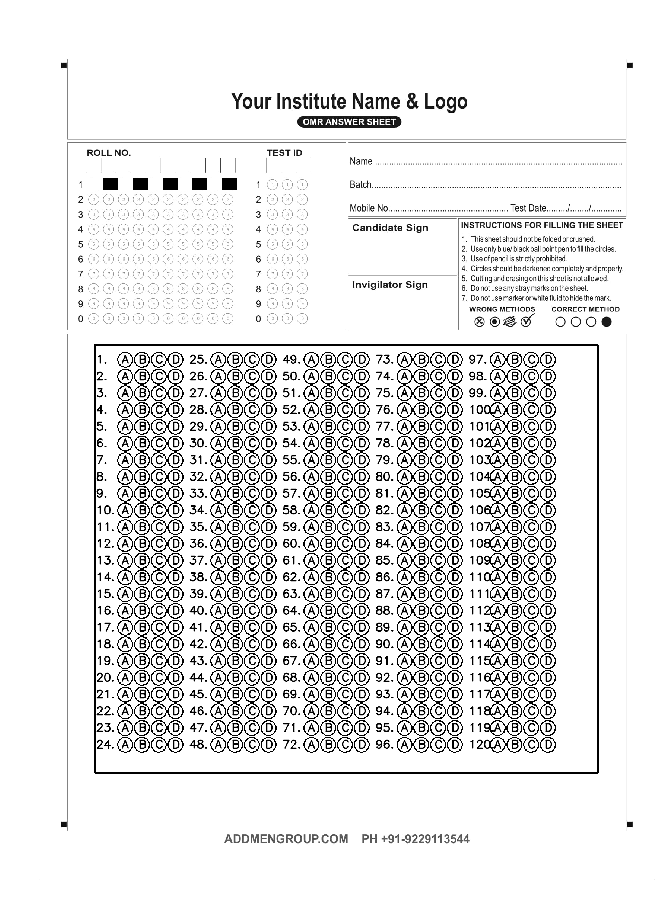

'plot("", a[453:453+31,132:132+31],5)\nplot("", a[453+31:453+62,132:132+31],5)'

In [0]:
p=40
for i in range(0,10):
  if i%2!=0:
    a[453:453+31,132+i*p:132+(i+1)*p]=0
  else:
    a[453:453+31,132+i*p:132+(i+1)*p]=255
  plot(""+str(i), a[453:453+31,132+i*p:132+(i+1)*p],20)
  
plot("",a)
'''plot("", a[453:453+31,132:132+31],5)
plot("", a[453+31:453+62,132:132+31],5)'''

1661 2015


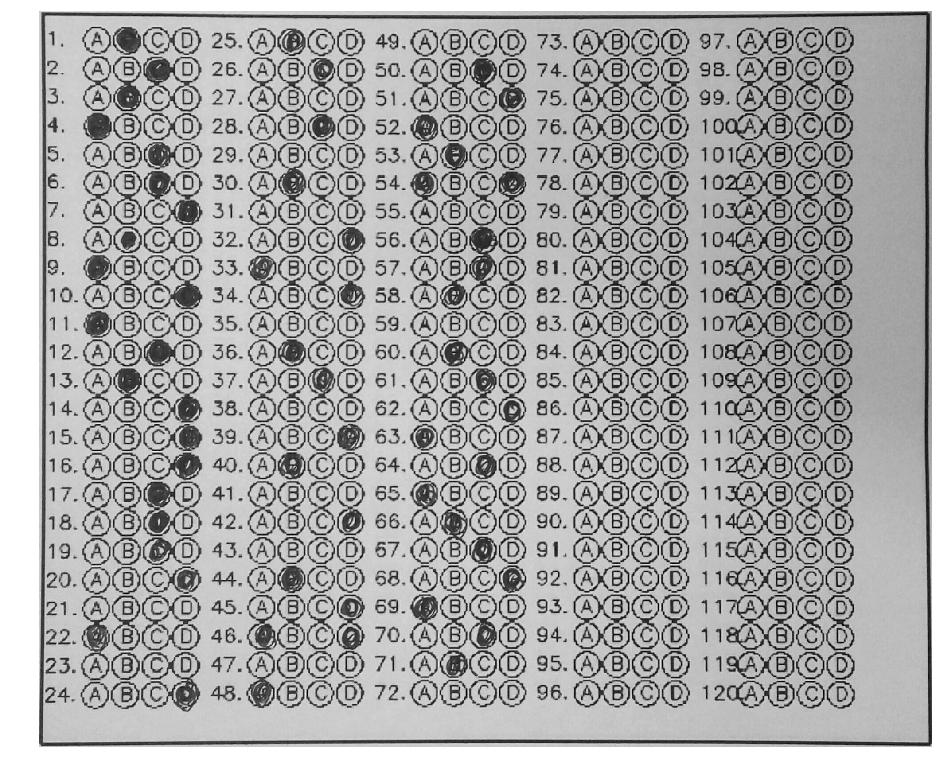

In [0]:
#showI("scan7.jpg")
#im_gray = cv2.imread("scan7.jpg", cv2.IMREAD_GRAYSCALE)
#thresh = 127
#a = cv2.threshold(im_gray, thresh, 255, cv2.THRESH_BINARY)[1]
a = cv2.imread("scan4.jpg", cv2.IMREAD_GRAYSCALE)
a.shape
plot("",a)

1661 2015


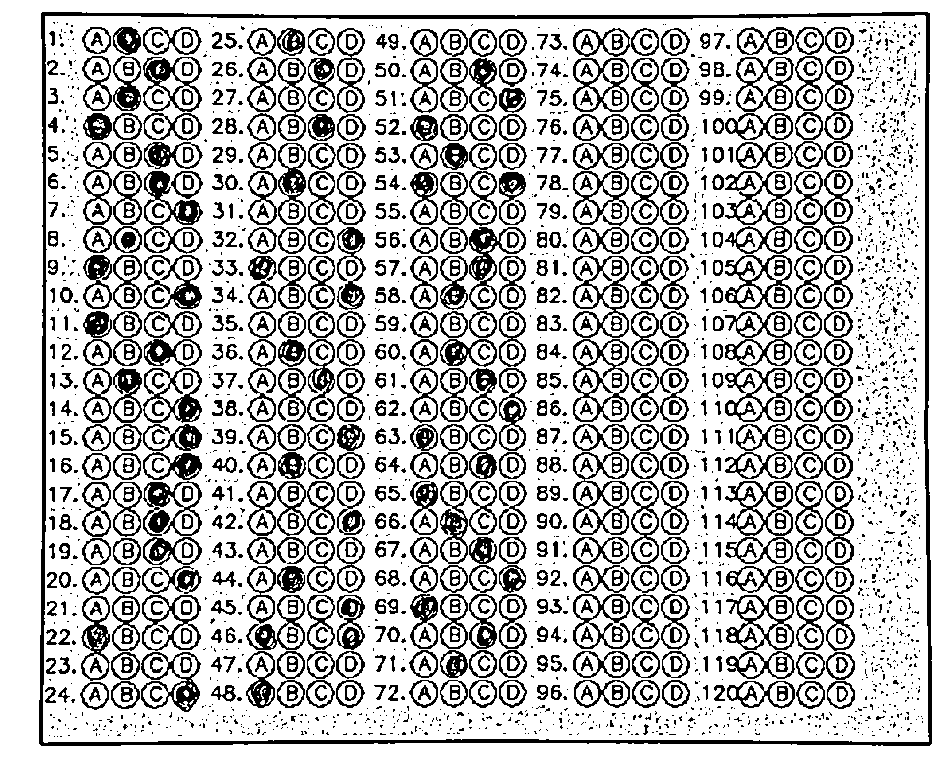

In [0]:
q = a.copy()
img = cv2.medianBlur(q,5)
a = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,25,2)
# th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
#             cv2.THRESH_BINARY,25,2)

#th2[th2<180] = 0
plot("", a)
#th3[th3<180] = 0
#th3[th3>=180] = 255
# plot("", th3)

In [0]:
def cnt(p):
  q = p.copy()
  q[q==255] = 1
  c_, d_ = p.shape
  return int((1 - sum(map(sum, q))/(c_*d_))*100)
  
  

1661 2015


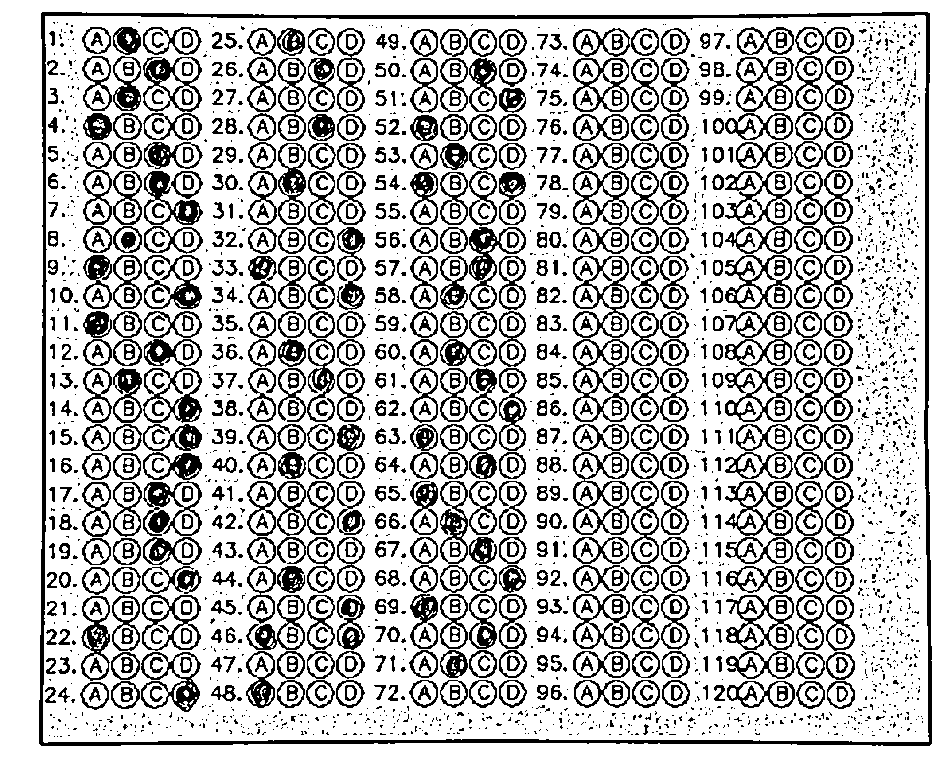

1. B
2. C
3. B
4. A
5. C
6. C
7. D
8.
9. A
10. D
11. A
12. C
13. B
14. D
15. D
16. D
17. C
18. C
19. C
20. (D)
21.
22. A
23.
24. D
25. B
26. (C)
27.
28. C
29.
30. B
31.
32. D
33. (A)
34. D
35.
36. B
37. (C)
38.
39. D
40. B
41.
42. (D)
43.
44. B
45. (D)
46. A (D)
47.
48. A
49.
50. C
51. (D)
52. A
53. B
54. A D
55.
56. C
57. C
58. (B)
59.
60. B
61. C
62.
63. (A)
64. C
65. A
66. B
67. C
68. (D)
69. A
70. (C)
71. (B)
72.
73.
74.
75.
76.
77.
78.
79.
80.
81.
82.
83.
84.
85.
86.
87.
88.
89.
90.
91.
92.
93.
94.
95.
96.
97.
98.
99.
100.
101.
102.
103.
104.
105.
106.
107.
108.
109.
110.
111.
112.
113.
114.
115.
116.
117.
118.
119.
120.



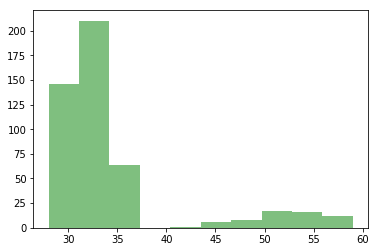

939 1123


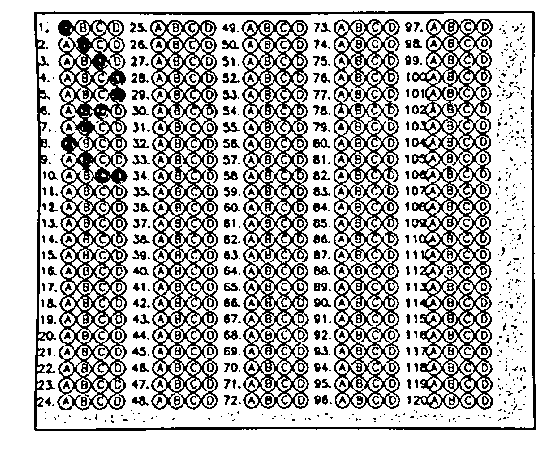

1. A
2. B
3. C
4. (B) D
5. D
6. B C
7. B
8. A
9. B
10. C D
11.
12.
13.
14.
15.
16.
17.
18.
19.
20.
21.
22.
23.
24.
25.
26.
27.
28. (B)
29.
30.
31.
32.
33.
34.
35.
36.
37.
38.
39.
40.
41.
42.
43.
44.
45.
46.
47.
48.
49.
50.
51.
52.
53.
54.
55.
56.
57.
58.
59.
60.
61.
62.
63.
64.
65.
66.
67.
68.
69.
70.
71.
72.
73.
74.
75.
76.
77.
78.
79.
80.
81.
82.
83.
84.
85.
86.
87.
88.
89.
90.
91.
92.
93.
94.
95.
96.
97.
98.
99.
100.
101.
102.
103.
104.
105.
106.
107.
108.
109.
110.
111.
112.
113.
114.
115.
116.
117.
118.
119.
120.



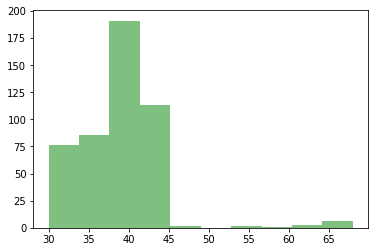

1716 2021


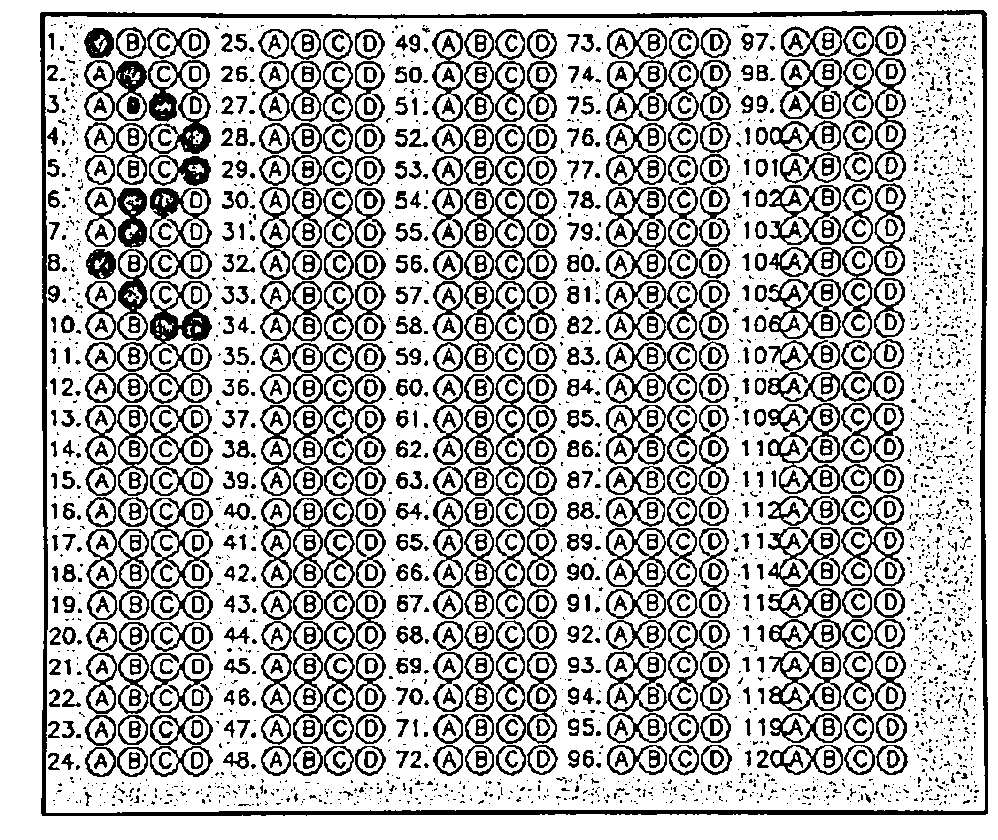

1. A
2. B
3. C
4. D
5. D
6. B C
7. B
8. A
9. B
10. C D
11.
12.
13.
14.
15.
16.
17.
18.
19.
20.
21.
22.
23.
24.
25.
26.
27.
28.
29.
30.
31.
32.
33.
34.
35.
36.
37.
38.
39.
40.
41.
42.
43.
44.
45.
46.
47.
48.
49.
50.
51.
52.
53.
54.
55.
56.
57.
58.
59.
60.
61.
62.
63.
64.
65.
66.
67.
68.
69.
70.
71.
72.
73.
74.
75.
76.
77.
78.
79.
80.
81.
82.
83.
84.
85.
86.
87.
88.
89.
90.
91.
92.
93.
94.
95.
96.
97.
98.
99.
100.
101.
102.
103.
104.
105.
106.
107.
108.
109.
110.
111.
112.
113.
114.
115.
116.
117.
118.
119.
120.



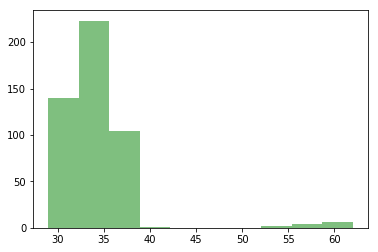

1761 2048


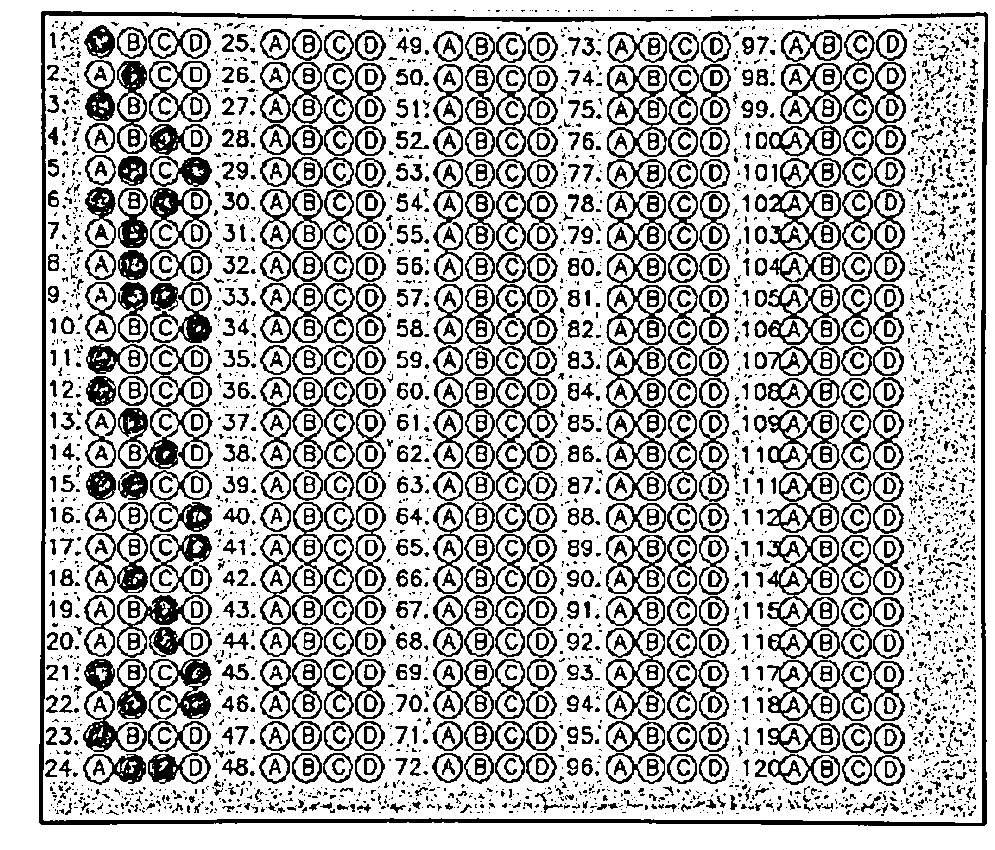

1. A
2. B
3. A
4. C
5. B D
6. A C
7. B
8. B
9. B C
10. D
11. A
12. A
13. B
14. C
15. A B
16. D
17. D
18. B
19. C
20. C
21. A D
22. B D
23. A
24. B C
25.
26.
27.
28.
29.
30.
31.
32.
33.
34.
35.
36.
37.
38.
39.
40.
41.
42.
43.
44.
45.
46.
47.
48.
49.
50.
51.
52.
53.
54.
55.
56.
57.
58.
59.
60.
61.
62.
63.
64.
65.
66.
67.
68.
69.
70.
71.
72.
73.
74.
75.
76.
77.
78.
79.
80.
81.
82.
83.
84.
85.
86.
87.
88.
89.
90.
91.
92.
93.
94.
95.
96.
97.
98.
99.
100.
101.
102.
103.
104.
105.
106.
107.
108.
109.
110.
111.
112.
113.
114.
115.
116.
117.
118.
119.
120.



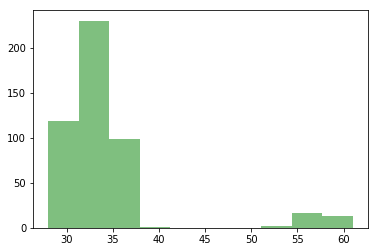

1658 2048


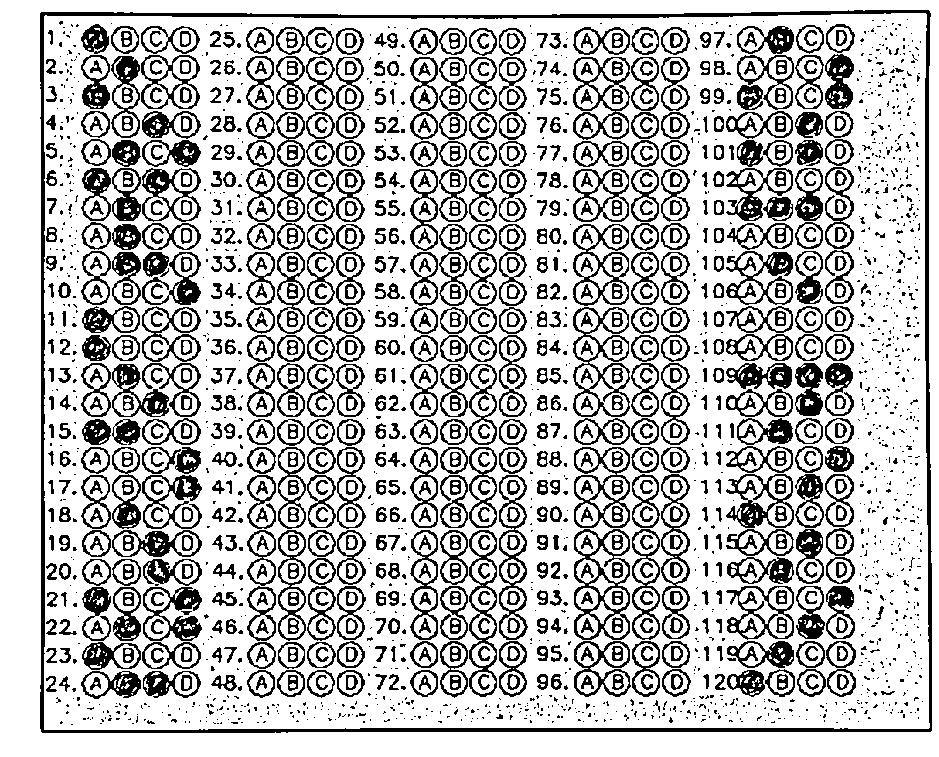

1. A
2. B
3. A
4. C
5. B D
6. A C
7. B
8. B
9. B C
10. D
11. A
12. A
13. B
14. C
15. A B
16. D
17. D
18. B
19. C
20. C
21. A D
22. B D
23. A
24. B C
25.
26.
27.
28.
29.
30.
31.
32.
33.
34.
35.
36.
37.
38.
39.
40.
41.
42.
43.
44.
45.
46.
47.
48.
49.
50.
51.
52.
53.
54.
55.
56.
57.
58.
59.
60.
61.
62.
63.
64.
65.
66.
67.
68.
69.
70.
71.
72.
73.
74.
75.
76.
77.
78.
79.
80.
81.
82.
83.
84.
85.
86.
87.
88.
89.
90.
91.
92.
93.
94.
95.
96.
97. B
98. D
99. A D
100. C
101. A C
102.
103. A B C
104.
105. B
106. C
107.
108.
109. A B C D
110. C
111. B
112. D
113. C
114. A
115. C
116. B
117. D
118. C
119. B
120. A



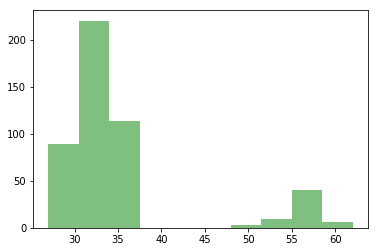

1852 2088


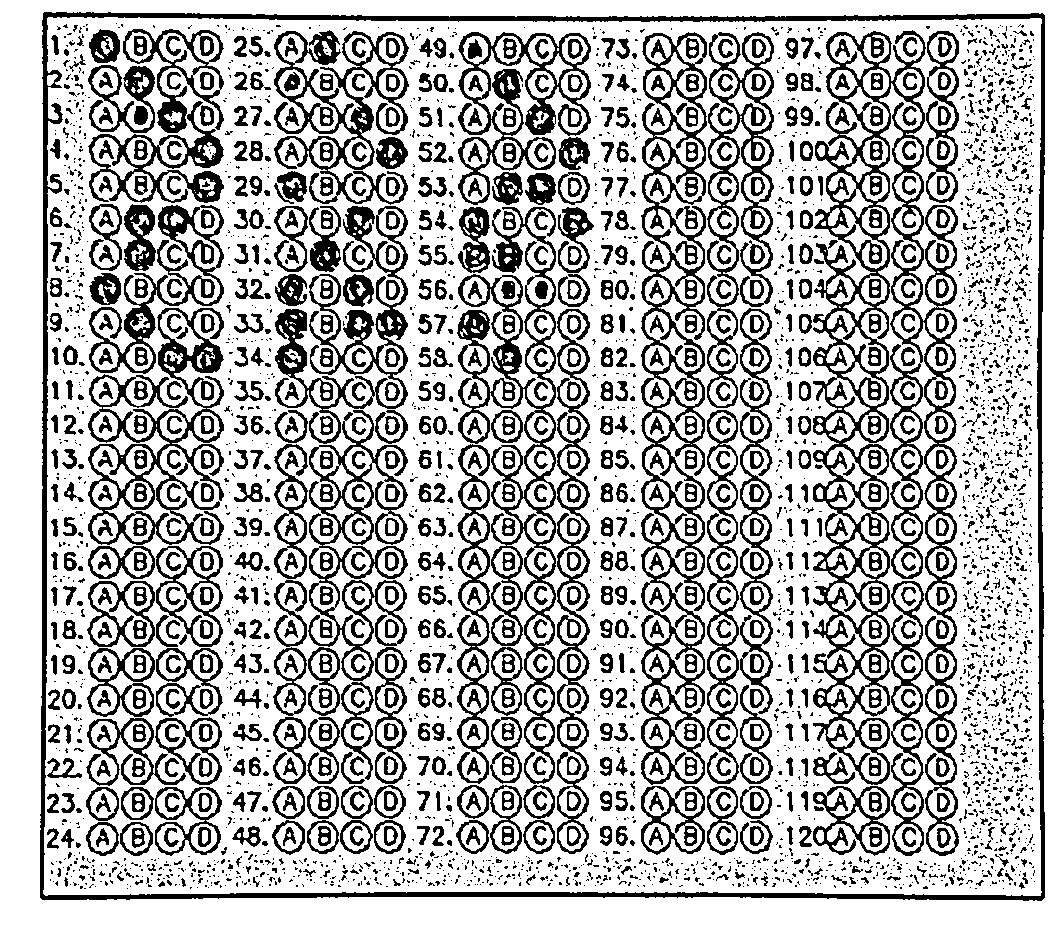

1. A
2. B
3. C
4. D
5. D
6. B C
7. B
8. A
9. B
10. C D
11.
12.
13.
14.
15.
16.
17.
18.
19.
20.
21.
22.
23.
24.
25. B
26.
27. C
28. D
29. A
30. C
31. B
32. A C
33. A C D
34. A
35.
36.
37.
38.
39.
40.
41.
42.
43.
44.
45.
46.
47.
48.
49.
50. B
51. C
52. D
53. B C
54. A D
55. (A) B
56.
57. A
58. B
59.
60.
61.
62.
63.
64.
65.
66.
67.
68.
69.
70.
71.
72.
73.
74.
75.
76.
77.
78.
79.
80.
81.
82.
83.
84.
85.
86.
87.
88.
89.
90.
91.
92.
93.
94.
95.
96.
97.
98.
99.
100.
101.
102.
103.
104.
105.
106.
107.
108.
109.
110.
111.
112.
113.
114.
115.
116.
117.
118.
119.
120.



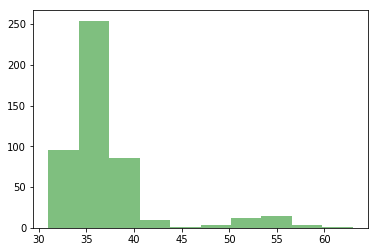

In [0]:
def cnt(p):
  q = p.copy()
  q[q==255] = 1
  c_, d_ = p.shape
  return int((1 - sum(map(sum, q))/(c_*d_))*100)


def gr(x):
  q = cv2.imread(x,0)
  img = cv2.medianBlur(q,5)
  a = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,25,2)
  plot("",a)
  start = (150,900)
  end = (1500,2050)
  color = (0,0,0)
  r =int(20)
  gap = int(20)
  cx = int(190)
  cy = int(940)
  font = cv2.FONT_HERSHEY_SIMPLEX
  text = list(string.ascii_uppercase)
  row = 0


  dy = int(1350)
  dx = int(1150)

  #1350X1150 standard

  height = a.shape[0]
  width = a.shape[1]

  strx1 = 53
  strx2 = (strx1+158)

  stry1 = 30
  stry2 = stry1+1277

  x_gap = 40
  nn = int(1)

  final = ""
  big_array = []

  for i in range(0,5):
    #plot("", a[int(stry1*height/dy):int(stry2*height/dy),int(strx1*width/dx):int(strx2*width/dx)],20)
    for j in range(0,24):
      stry2 = stry1 + 51
      show = str(nn) + "."
      array=[]
      
      #print(show,end =" -> ")
      for k in range(0,4):
        p = a[int(stry1*height/dy):int(stry2*height/dy),int((strx1+x_gap*k)*width/dx):int((strx1+x_gap*(k+1))*width/dx)]
        #plot("", p,20)
        ans = cnt(p)#sum(map(sum, p))//100
        #print( ans, end=" " )
        big_array.append(ans)
        array.append(ans)
        if(ans>=50):
            show = show + " " + text[k]
        elif(ans>45):
            show = show + " (" + text[k] + ")"

      #print()
      #plot("", a[int(stry1*height/dy):int(stry2*height/dy),int(strx1*width/dx):int(strx2*width/dx)],20)
      #print(show)
#       sum_of_array = max(array)
#       for l in range(0,4):
#         var1 = (array[l]/sum_of_array)*100
#         if(var1<90):
#           show = show + " " + text[l]

      final = final + show + "\n"
      nn = nn + 1
      stry1 = stry2 + 1
    strx1 = (strx2+53)
    strx2 = (strx1+158)
    stry1 = 30
    stry2 = stry1+1277


  print(final)

  num_bins = 10
  n, bins, patches = plt.hist(big_array, num_bins, facecolor='g', alpha=0.5)
  plt.show()

#function end......  

#pics = ["scan10.jpg"]
pics = ["scan4.jpg","scan7.jpg", "scan8.jpg", "scan9.jpg", "scan10.jpg", "crop_3327.jpeg"]

for i in pics:
  gr(i)

#plt.plot([5607, 5725, 5741, 5766, 5804, 5859, 5971, 5975, 6114], [3769, 3733, 3699, 3605, 3465, 3843, 3771, 3621, 3614])
  
#for i in range(0,n):
  #cv2.circle(a,(cx,cy), r, color, 2)
#  cv2.putText(a,str(i+1)+".",(cx-37,cy+9), font, 1,(0,0,0),2,cv2.LINE_AA)
#  cx = 2*r + cx +1
#  for j in range(0,4):
#    cv2.circle(a,(cx,cy), r, color, 2)
#    cv2.putText(a,text[j],(cx-9,cy+9), font, 1,(0,0,0),2,cv2.LINE_AA)
#    cx = 2*r + cx +5
#  cy = 2*r + cy +5 
#  if(cy>2000):
#    row = row + 1
#    cy = int(940)
#  cx = 190 + row*250


#plot("",a,100)
#plot("", a[30:1602,100:370],20)
#plot("", a[30:102,100:160],10)
#plot("", a[30:102,170:230],10)

In [0]:
#plot("", a[2339-157:2339-140,1654-76:1654-59],2)

[149, 68] [2191, 1587] 2042 1519
1510
1170
1 1
78 41


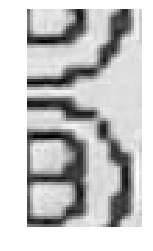

1 2
78 41


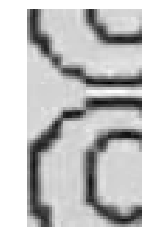

1 3
78 42


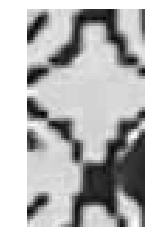

1 4
78 41


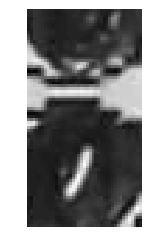

11 1
78 42


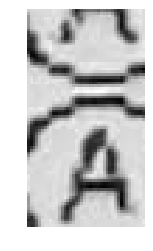

11 2
78 41


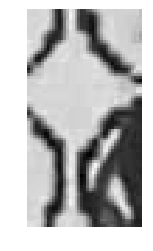

11 3
78 41


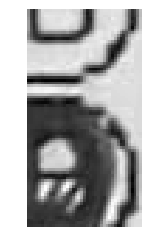

11 4
78 42


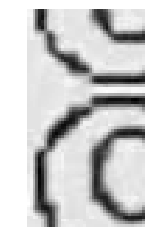

21 1
78 41


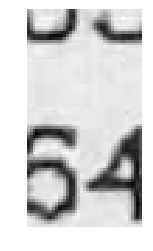

21 2
78 41


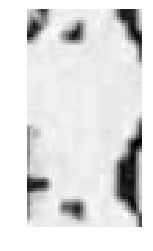

21 3
78 42


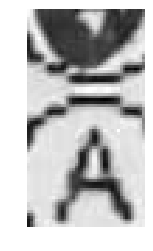

21 4
78 41


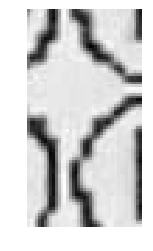

31 1
78 42


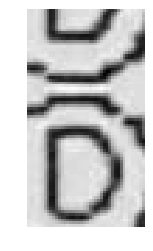

31 2
78 41


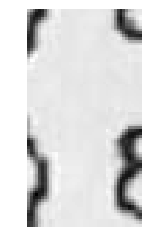

31 3
78 41


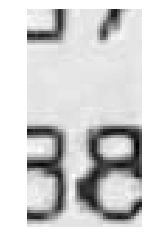

31 4
78 42


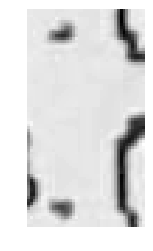

41 1
78 41


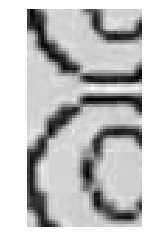

41 2
78 42


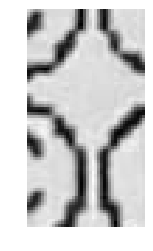

41 3
78 41


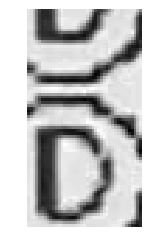

41 4
78 41


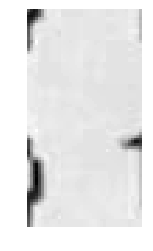

2 1
77 41


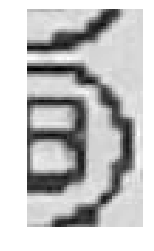

2 2
77 41


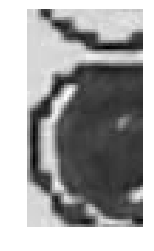

2 3
77 42


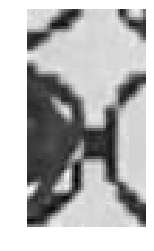

2 4
77 41


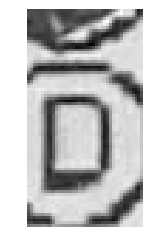

12 1
77 42


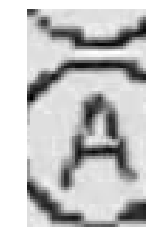

12 2
77 41


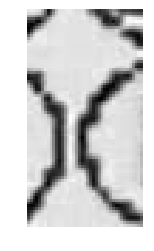

12 3
77 41


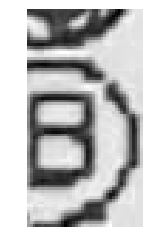

12 4
77 42


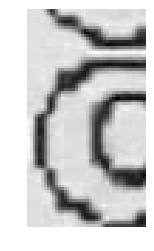

22 1
77 41


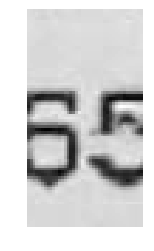

22 2
77 41


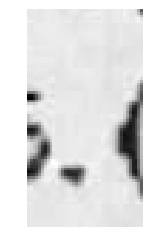

22 3
77 42


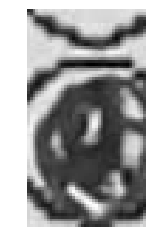

22 4
77 41


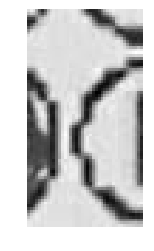

32 1
77 42


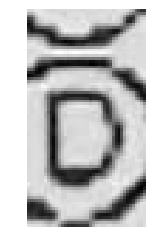

32 2
77 41


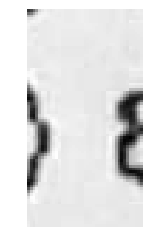

32 3
77 41


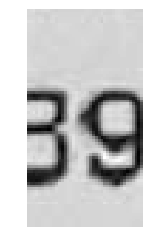

32 4
77 42


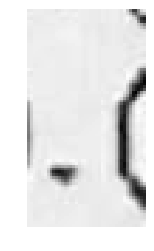

42 1
77 41


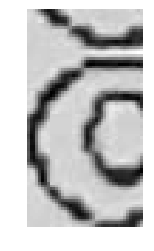

42 2
77 42


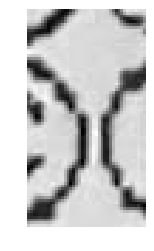

42 3
77 41


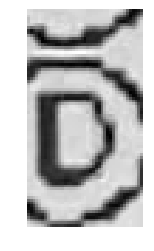

42 4
77 41


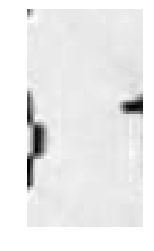

3 1
78 41


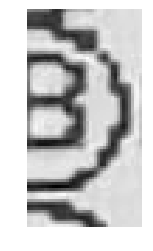

3 2
78 41


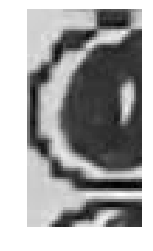

3 3
78 42


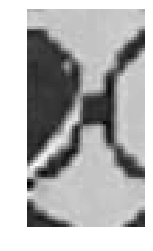

3 4
78 41


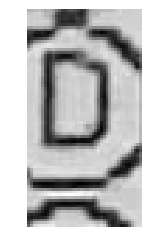

13 1
78 42


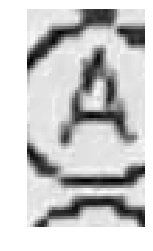

13 2
78 41


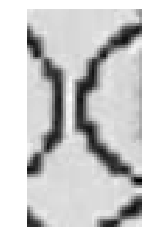

13 3
78 41


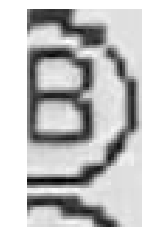

13 4
78 42


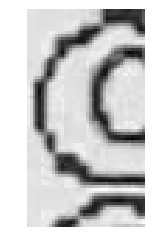

23 1
78 41


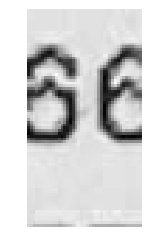

23 2
78 41


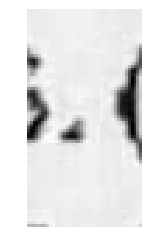

23 3
78 42


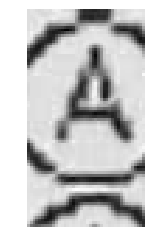

23 4
78 41


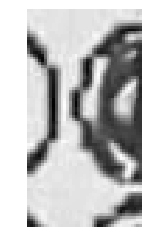

33 1
78 42


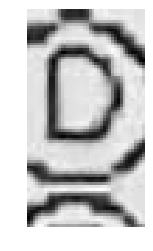

33 2
78 41


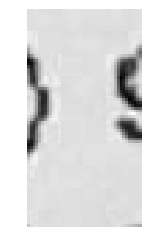

33 3
78 41


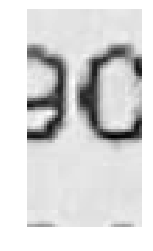

33 4
78 42


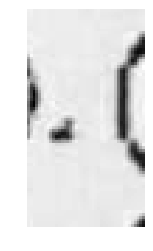

43 1
78 41


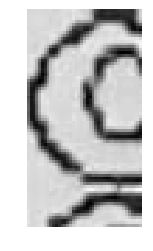

43 2
78 42


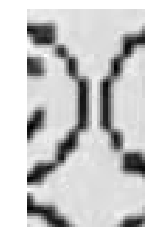

43 3
78 41


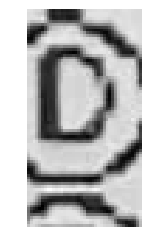

43 4
78 41


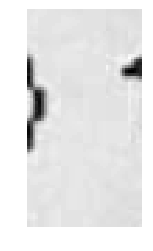

4 1
78 41


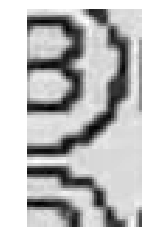

4 2
78 41


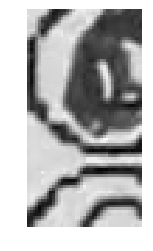

4 3
78 42


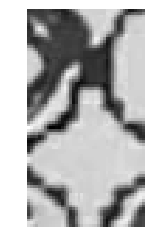

4 4
78 41


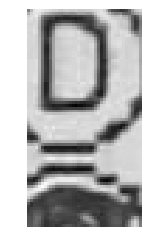

14 1
78 42


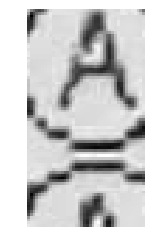

14 2
78 41


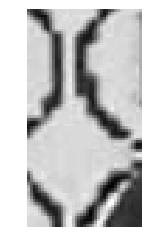

14 3
78 41


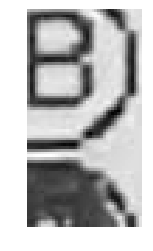

14 4
78 42


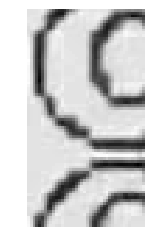

24 1
78 41


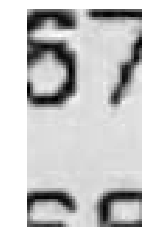

24 2
78 41


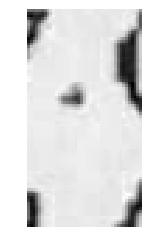

24 3
78 42


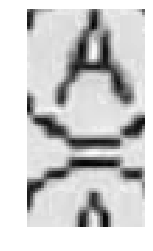

24 4
78 41


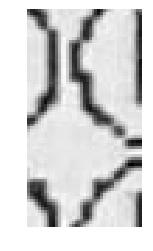

34 1
78 42


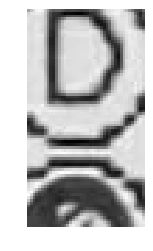

34 2
78 41


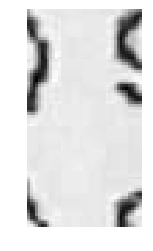

34 3
78 41


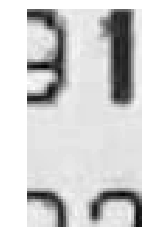

34 4
78 42


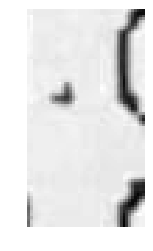

44 1
78 41


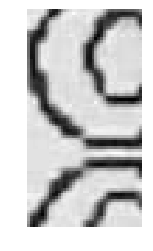

44 2
78 42


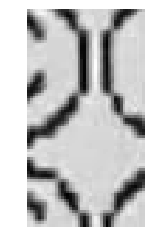

44 3
78 41


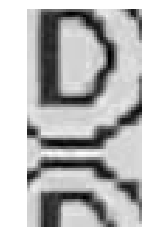

44 4
78 41


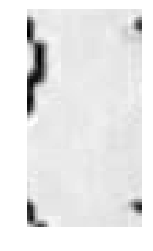

5 1
77 41


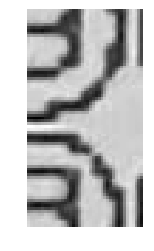

5 2
77 41


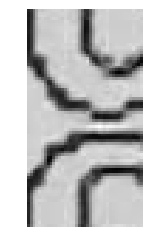

5 3
77 42


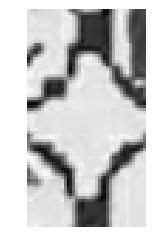

5 4
77 41


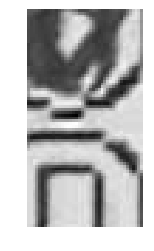

15 1
77 42


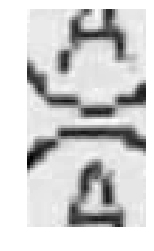

15 2
77 41


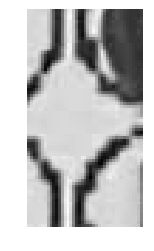

15 3
77 41


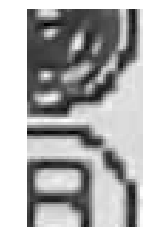

15 4
77 42


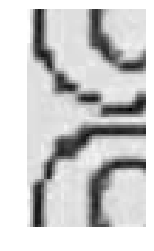

25 1
77 41


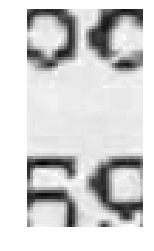

25 2
77 41


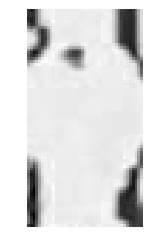

25 3
77 42


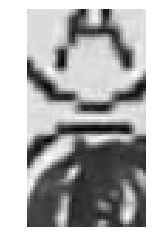

25 4
77 41


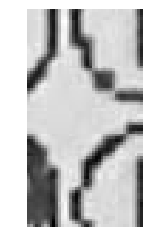

35 1
77 42


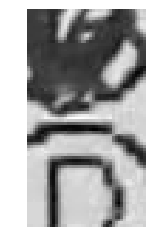

35 2
77 41


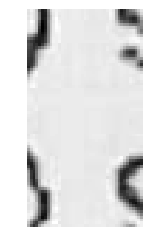

35 3
77 41


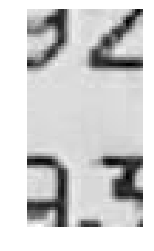

35 4
77 42


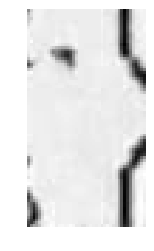

45 1
77 41


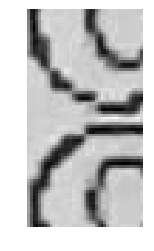

45 2
77 42


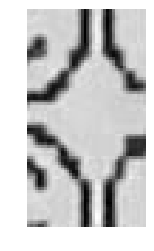

45 3
77 41


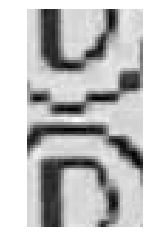

45 4
77 41


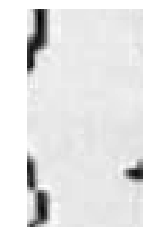

6 1
77 41


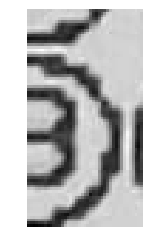

6 2
77 41


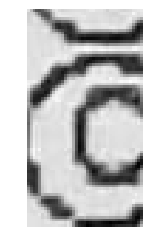

6 3
77 42


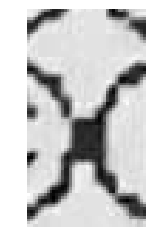

6 4
77 41


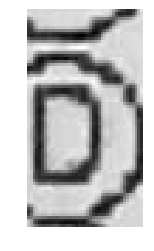

16 1
77 42


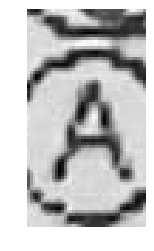

16 2
77 41


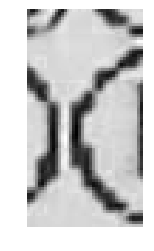

16 3
77 41


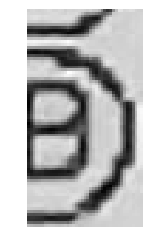

16 4
77 42


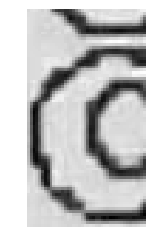

26 1
77 41


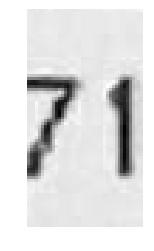

26 2
77 41


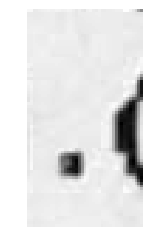

26 3
77 42


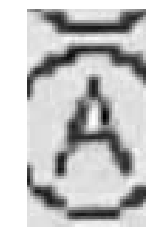

26 4
77 41


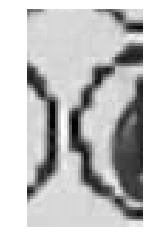

36 1
77 42


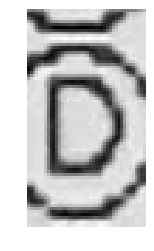

36 2
77 41


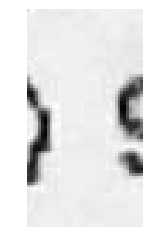

36 3
77 41


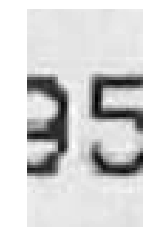

36 4
77 42


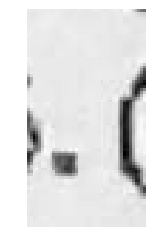

46 1
77 41


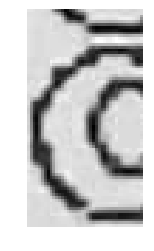

46 2
77 42


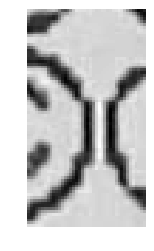

46 3
77 41


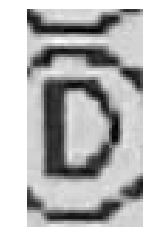

46 4
77 41


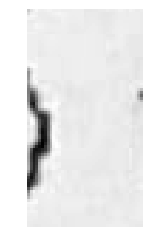

7 1
78 41


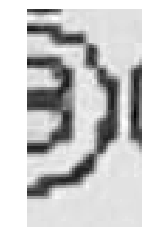

7 2
78 41


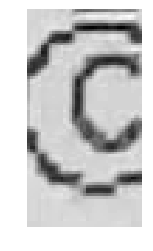

7 3
78 42


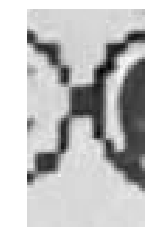

7 4
78 41


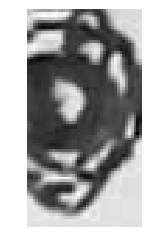

17 1
78 42


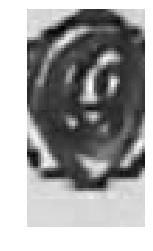

17 2
78 41


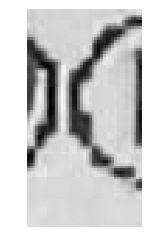

17 3
78 41


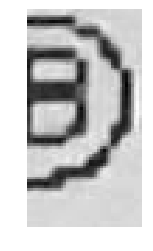

17 4
78 42


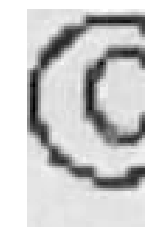

27 1
78 41


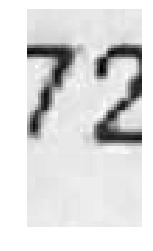

27 2
78 41


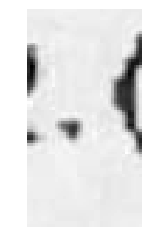

27 3
78 42


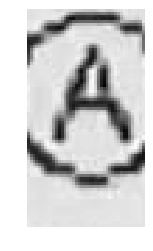

27 4
78 41


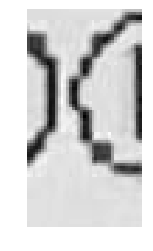

37 1
78 42


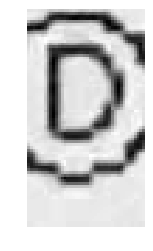

37 2
78 41


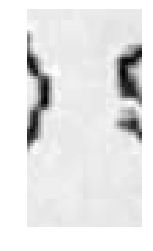

37 3
78 41


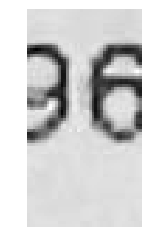

37 4
78 42


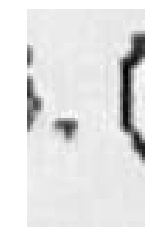

47 1
78 41


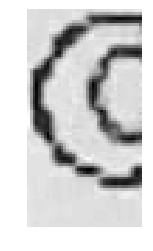

47 2
78 42


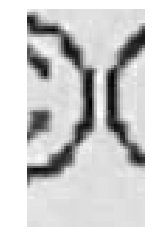

47 3
78 41


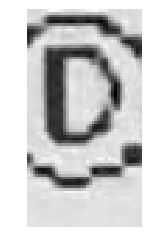

47 4
78 41


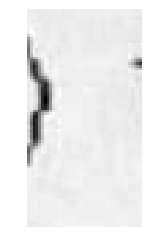

8 1
75 41


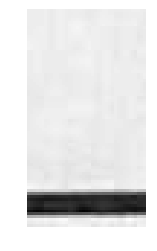

8 2
75 41


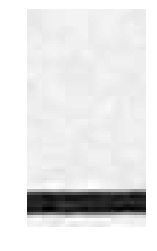

8 3
75 42


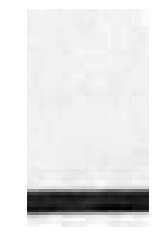

8 4
75 41


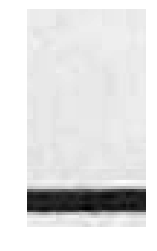

18 1
75 42


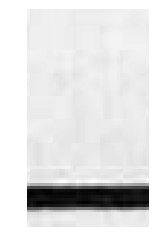

18 2
75 41


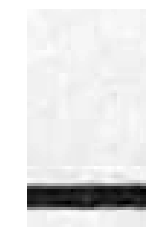

18 3
75 41


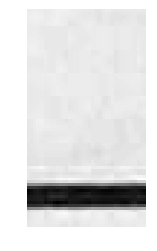

18 4
75 42


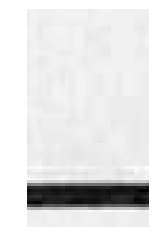

28 1
75 41


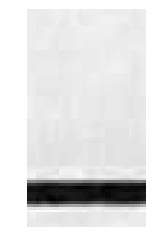

28 2
75 41


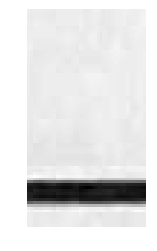

28 3
75 42


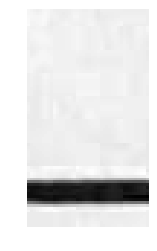

28 4
75 41


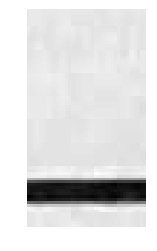

38 1
75 42


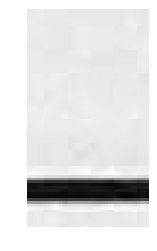

38 2
75 41


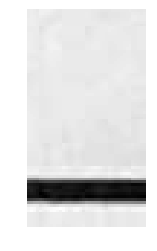

38 3
75 41


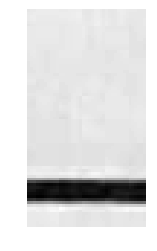

38 4
75 42


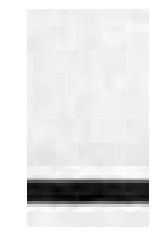

48 1
75 41


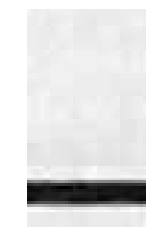

48 2
75 42


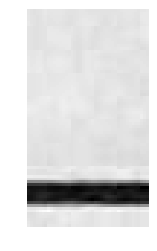

48 3
75 41


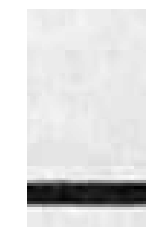

48 4
75 41


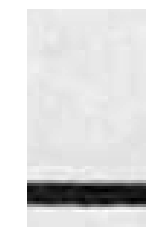

9 1
0 41


/usr/local/lib/python3.6/dist-packages/matplotlib/image.py:857: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=-0.5, top=-0.5
  self.axes.set_ylim((ymin, ymax), auto=None)
/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_base.py:1500: RuntimeWarning: divide by zero encountered in double_scalars
  fig_aspect = figH / figW


RuntimeError: ignored

<Figure size 0x288 with 1 Axes>

9 2
0 41


RuntimeError: ignored

<Figure size 0x288 with 1 Axes>

9 3
0 42


RuntimeError: ignored

<Figure size 0x288 with 1 Axes>

9 4
0 41


RuntimeError: ignored

<Figure size 0x288 with 1 Axes>

19 1
0 42


RuntimeError: ignored

<Figure size 0x288 with 1 Axes>

19 2
0 41


RuntimeError: ignored

<Figure size 0x288 with 1 Axes>

19 3
0 41


RuntimeError: ignored

<Figure size 0x288 with 1 Axes>

19 4
0 42


RuntimeError: ignored

<Figure size 0x288 with 1 Axes>

29 1
0 41


RuntimeError: ignored

<Figure size 0x288 with 1 Axes>

29 2
0 41


RuntimeError: ignored

<Figure size 0x288 with 1 Axes>

29 3
0 42


RuntimeError: ignored

<Figure size 0x288 with 1 Axes>

29 4
0 41


RuntimeError: ignored

<Figure size 0x288 with 1 Axes>

39 1
0 42


RuntimeError: ignored

<Figure size 0x288 with 1 Axes>

39 2
0 41


RuntimeError: ignored

<Figure size 0x288 with 1 Axes>

39 3
0 41


RuntimeError: ignored

<Figure size 0x288 with 1 Axes>

39 4
0 42


RuntimeError: ignored

<Figure size 0x288 with 1 Axes>

49 1
0 41


RuntimeError: ignored

<Figure size 0x288 with 1 Axes>

49 2
0 42


RuntimeError: ignored

<Figure size 0x288 with 1 Axes>

49 3
0 41


RuntimeError: ignored

<Figure size 0x288 with 1 Axes>

49 4
0 41


RuntimeError: ignored

<Figure size 0x288 with 1 Axes>

10 1
0 41


RuntimeError: ignored

<Figure size 0x288 with 1 Axes>

10 2
0 41


RuntimeError: ignored

<Figure size 0x288 with 1 Axes>

10 3
0 42


RuntimeError: ignored

<Figure size 0x288 with 1 Axes>

10 4
0 41


RuntimeError: ignored

<Figure size 0x288 with 1 Axes>

20 1
0 42


RuntimeError: ignored

<Figure size 0x288 with 1 Axes>

20 2
0 41


RuntimeError: ignored

<Figure size 0x288 with 1 Axes>

20 3
0 41


RuntimeError: ignored

<Figure size 0x288 with 1 Axes>

20 4
0 42


RuntimeError: ignored

<Figure size 0x288 with 1 Axes>

30 1
0 41


RuntimeError: ignored

<Figure size 0x288 with 1 Axes>

30 2
0 41


RuntimeError: ignored

<Figure size 0x288 with 1 Axes>

30 3
0 42


RuntimeError: ignored

<Figure size 0x288 with 1 Axes>

30 4
0 41


RuntimeError: ignored

<Figure size 0x288 with 1 Axes>

40 1
0 42


RuntimeError: ignored

<Figure size 0x288 with 1 Axes>

40 2
0 41


RuntimeError: ignored

<Figure size 0x288 with 1 Axes>

40 3
0 41


RuntimeError: ignored

<Figure size 0x288 with 1 Axes>

40 4
0 42


RuntimeError: ignored

<Figure size 0x288 with 1 Axes>

50 1
0 41


RuntimeError: ignored

<Figure size 0x288 with 1 Axes>

50 2
0 42


RuntimeError: ignored

<Figure size 0x288 with 1 Axes>

50 3
0 41


RuntimeError: ignored

<Figure size 0x288 with 1 Axes>

50 4
0 41


RuntimeError: ignored

<Figure size 0x288 with 1 Axes>

In [0]:
a = cv2.imread("scan4.jpg", 0)
x=[149,68]
y=[2191,1587]
d1=y[0]-x[0]
d2=y[1]-x[1]
print(x,y,d1,d2)
print(int(x[0]+d1/1.5))
print(x[0]+d1//2)

stx1=x[0]+(d1)*0.40
stx2=x[0]+d1*0.82
sty1=x[1]+d2*0.083
sty2=x[1]+d2*0.94



xinc=0.038


yinc=0.188

ygap=0.045


#sty1=x[1]+d2*(0.083+0*yinc)
#sty2=x[1]+d2*(0.083+1*yinc-ygap)


#print(a[int(x[0]+d1/1.5):x[0]+d1//2,x[1]:x[1]+d2//2])
#plot("",a[int(x[0]+d1*(0.40+2*xinc)):int(x[0]+d1*(0.40+3*xinc)),int(sty1):int(sty2)],2)

#plot("",a[int(stx1):int(stx2),int(x[1]+d2*0.275):int(sty2)],80)

#def question_circle(n):
#  print(n)
#  row=n%10
#  col=n//10
#  if(row>=5):
#    row=row+1
#  if(row==0):
#    row=11
#  stx1=x[0]+d1*(0.40+row*xinc)
#  stx2=x[0]+d1*(0.40+(row+1)*xinc)
#  sty1=x[1]+d2*(0.043+col*yinc)
#  sty2=x[1]+d2*(0.043+(col+1)*yinc-ygap)
#  plot("",a[int(stx1):int(stx2),int(sty1):int(sty2)],10)
  #dist=(sty2-sty1)/5.25
  #for k in range(0,4):
  #  plot("",a[int(stx1):int(stx2),int(sty1+dist*k):int(sty1+dist*(k+1))],20)
  
  
for j in range(0,11):
  stx1=x[0]+d1*(0.40+j*xinc)
  stx2=x[0]+d1*(0.40+(j+1)*xinc)
  if(j!=5):
    for i in range(0,5):
      if(j<5):
        name=(i)*10+(j+1)
      if(j>5):
        name=(i)*10+j
      sty1=x[1]+d2*(0.083+i*yinc)
      sty2=x[1]+d2*(0.083+(i+1)*yinc-ygap)
      dist=(sty2-sty1)/5.25
      for k in range(0,4):
        print(name,k+1)
        plot("",a[int(stx1):int(stx2),int(sty1+dist*k):int(sty1+dist*(k+1))],10)
        #plot("",a[int(stx1):int(stx2),int(sty1):int(sty2)],10)

  
#for i in range(1,49):
#  question_circle(i)
